In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
# Load Spotify dataset
songs = pd.read_csv('SpotifyFeatures.csv') 

In [5]:
# Display the first 5 rows
songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [6]:
# Check basic info of the dataset
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
songs.describe(include='all')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725,232725,232724,232725,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000
unique,27,14564,148614,176774,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,3R73Y7X53MIQZWnKloWq5i,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151744,NaN,NaN,200760,NaN
mean,NaN,NaN,NaN,NaN,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,NaN,0.215009,-9.569885,NaN,0.120765,117.666585,NaN,0.454917
std,NaN,NaN,NaN,NaN,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,NaN,0.198273,5.998204,NaN,0.185518,30.898907,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.778000,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054000,NaN,0.660000


In [8]:
# Check missing values
print(songs.isnull().sum())


genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Basic EDA

Object And Discrete Columns

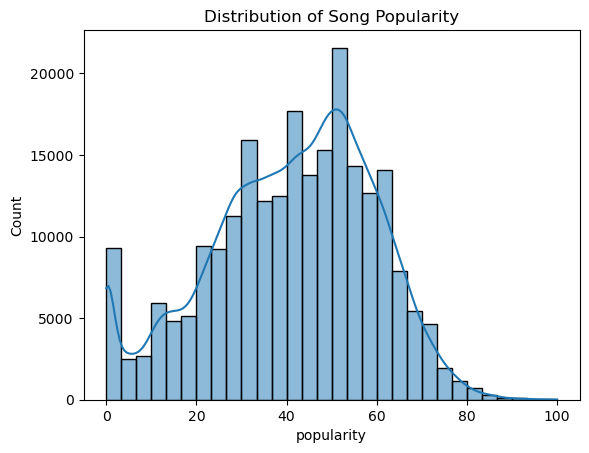

In [10]:
# Distribution of song popularity
sns.histplot(songs['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.show()

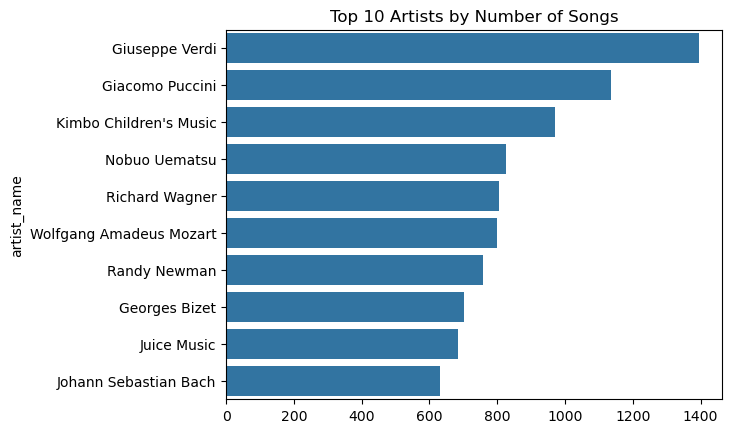

In [11]:
# Top 10 artists by number of tracks
top_artists = songs['artist_name'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Number of Songs')
plt.show()

Distribution of Popularity

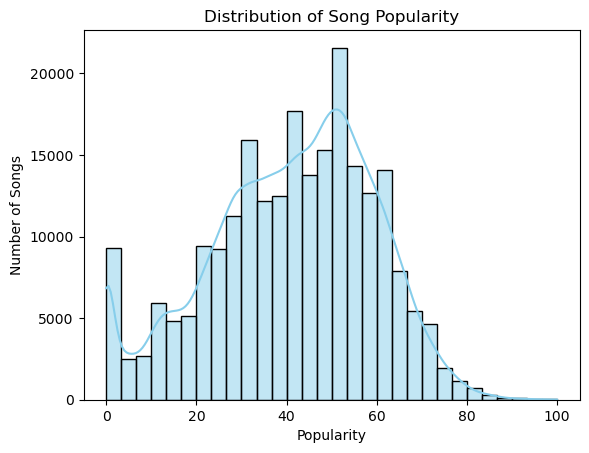

In [12]:
sns.histplot(songs['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.show()


Top 10 Most Popular Songs

C:\Users\Kishor\AppData\Local\Temp\ipykernel_32548\1181235464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_name', data=top_songs, palette='viridis')


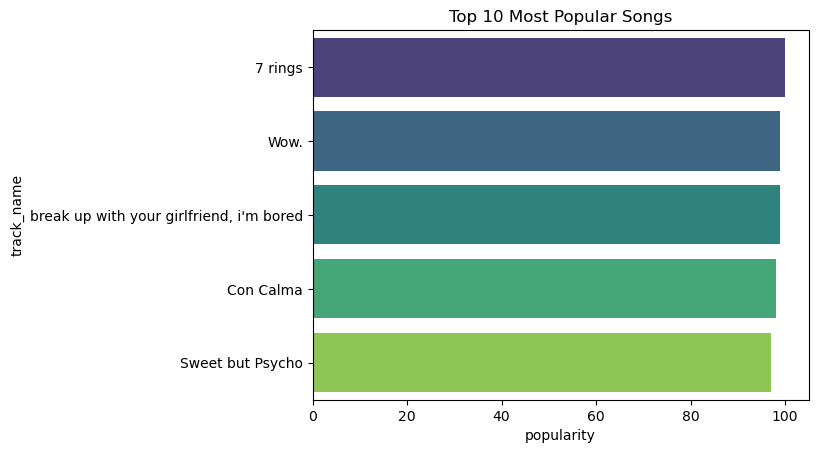

In [13]:
top_songs = songs[['track_name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
sns.barplot(x='popularity', y='track_name', data=top_songs, palette='viridis')
plt.title('Top 10 Most Popular Songs')
plt.show()

Popularity by Artists()

C:\Users\Kishor\AppData\Local\Temp\ipykernel_32548\748111126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


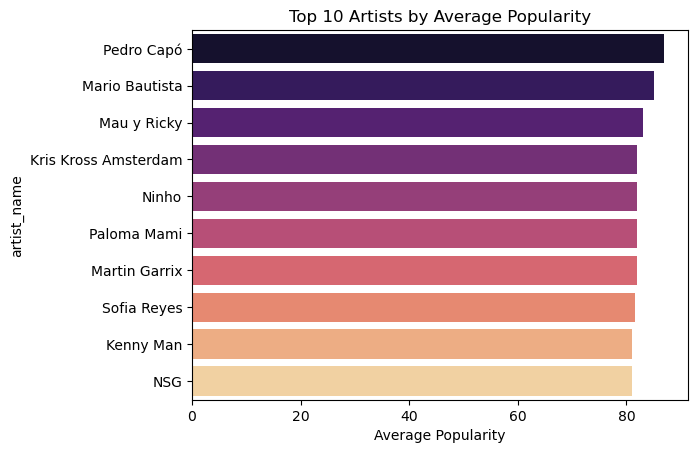

In [15]:
top_artists = songs.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.show()

Feature Selection by checking if that song is popular or not

In [19]:
 #Popular song or not (popularity > 70)
 songs['popular'] = (songs['popularity'] > 70).astype(int)

# Select features for prediction
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'instrumentalness', 'valence', 'acousticness', 'tempo', 'duration_ms']
X = songs[features]
y = songs['popular']

# Split the data into 2 test models Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9909549897948222


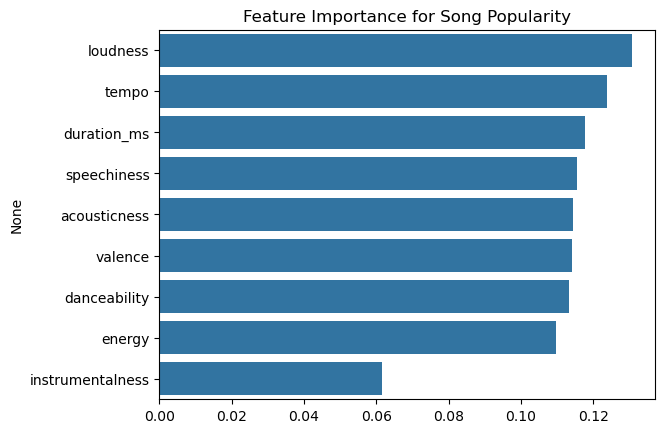

In [20]:
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=importance.values, y=importance.index)
plt.title('Feature Importance for Song Popularity')
plt.show()

Conclusion:

Popular songs usually have high energy, danceability, and positive mood. Using audio features, we can predict song popularity and gain insights to help recommend or produce hit tracks.